## Clustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('wine.csv')
df.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
# Generate summary statistics for numerical columns in the dataset
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Display unique values in the 'Wine' column
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [ ]:
Y = df.drop("Wine", axis = 1)
X = df.drop("Wine", axis = 1)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Scale the features using MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
# Perform PCA (Principal Component Analysis) to reduce dimensionality
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
# Calculate and display the explained variance ratio for each principal component

per_var = np.round(pca.explained_variance_ratio_*100, 1)
print(per_var)

[40.7 19.   8.6  7.4  5.6  4.7  3.7  2.4  2.3  2.3  1.4  1.3  0.8]


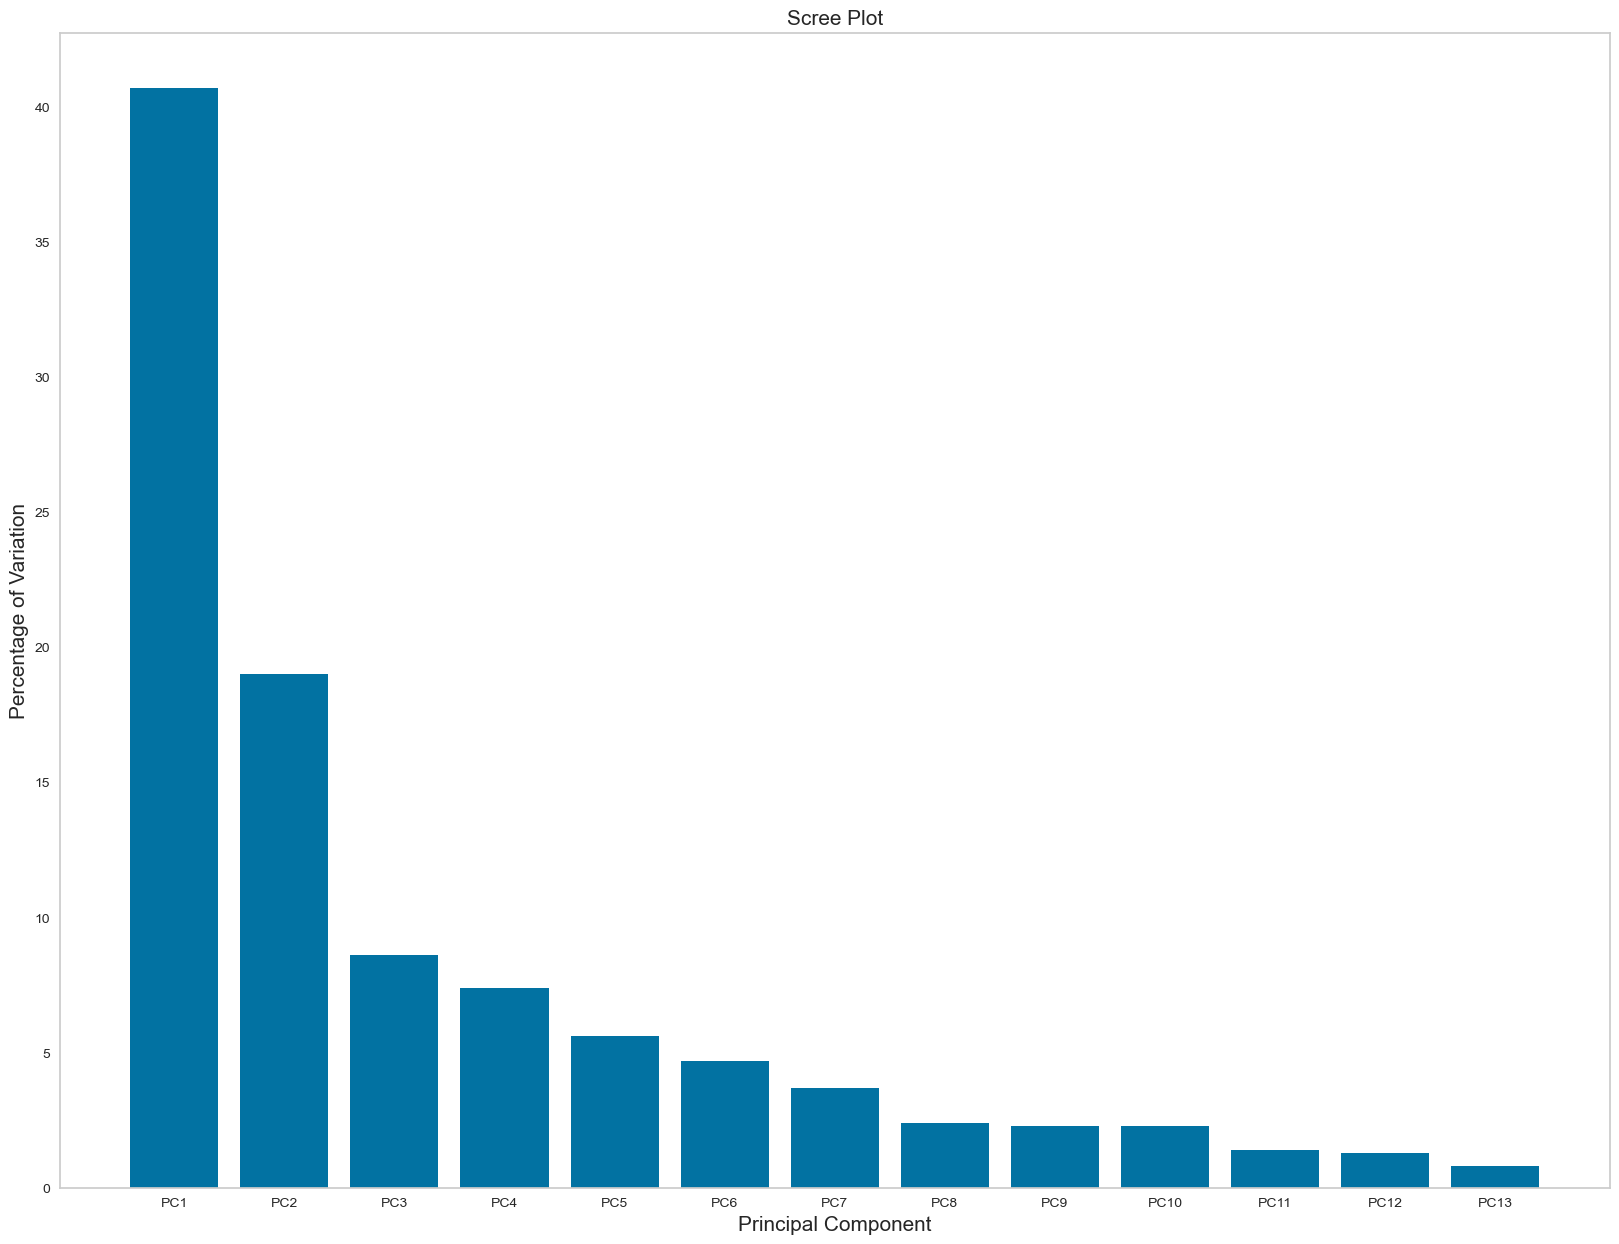

In [ ]:
# Plot a scree plot to visualize the percentage of variation explained by each principal component
plt.figure(figsize = (20,15))
princ_comp = ["PC" + str(x) for x in range(1, 14)]
plt.bar(x = range(1, 14), height = per_var, tick_label = princ_comp)
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

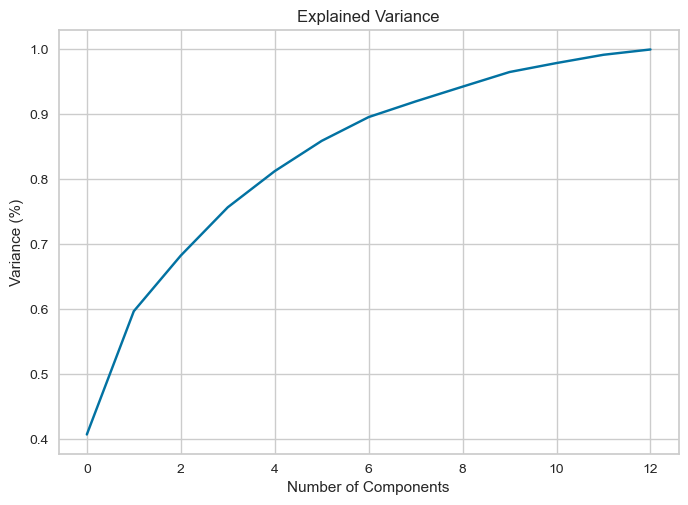

In [ ]:
# Plot cumulative explained variance to decide the number of components to retain
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [ ]:
# Display the principal component loadings
pd.DataFrame(pca.components_, columns = princ_comp, index = X.columns)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
Malic.acid,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
Ash,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968
Acl,-0.040328,0.486032,-0.241976,-0.081694,0.015880,-0.052643,-0.027033,-0.709095,0.076574,-0.026322,-0.352498,0.082062,-0.229793
Mg,-0.278010,-0.412890,0.286394,0.418305,0.470899,-0.018030,0.002573,-0.360038,0.148666,0.200582,-0.077162,-0.263396,-0.076556
Phenols,-0.137254,-0.213103,-0.300965,-0.135610,-0.312519,0.283604,0.147045,0.197232,0.503115,0.388032,-0.283041,-0.167278,-0.276349
Flavanoids,-0.275352,0.310302,-0.171805,-0.297556,0.520419,-0.066524,-0.050698,0.214889,0.466207,-0.212596,0.193315,-0.224561,0.188372
Nonflavanoid.phenols,0.555031,-0.076928,-0.123460,0.270756,-0.019937,-0.413384,-0.156461,-0.034232,0.483470,-0.036924,0.295372,0.102303,-0.260229
Proanth,0.326687,-0.014471,-0.044362,-0.204924,0.471910,0.351232,0.088960,0.122889,-0.284054,-0.023708,0.068775,-0.060197,-0.624839
Color.int,-0.035912,-0.237073,-0.056899,-0.132503,0.325868,-0.263006,-0.199445,0.236775,0.018743,0.039143,-0.534248,0.602194,0.023829


In [ ]:
# Transform the data using PCA
pca_data = pca.transform(X)
pca_df = pd.DataFrame(pca_data, columns = princ_comp)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,-0.009818,-0.003105,-0.050829,0.043147,0.033437,-0.019795
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,0.047284,-0.047386,-0.081414,-0.050335,0.051438,-0.032272
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,-0.037139,-0.001465,0.073544,0.131167,0.111606,0.038913
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,-0.024662,0.011399,0.196597,0.030275,0.057329,0.011031


In [ ]:
# Retain only the first three principal components for further analysis
pca_df1 = pca_df[["PC1",'PC2','PC3']]
pca_df1

,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


In [ ]:
pca_df1['wine'] = df['Wine']
pca_df1

,PC1,PC2,PC3,wine
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
...,...,...,...,...
173,0.739510,-0.471901,0.209360,3
174,0.581781,-0.348366,0.083590,3
175,0.626313,-0.546857,-0.030495,3
176,0.572991,-0.425516,-0.094537,3


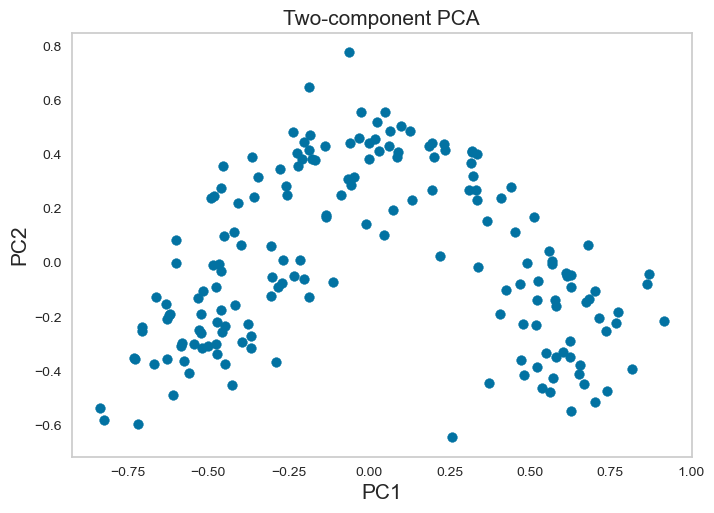

In [ ]:
# Plot the data observations in the space of the first two principal components

plt.scatter(pca_df1.PC1, pca_df1.PC2)
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.grid();

### **K Means Clustering**

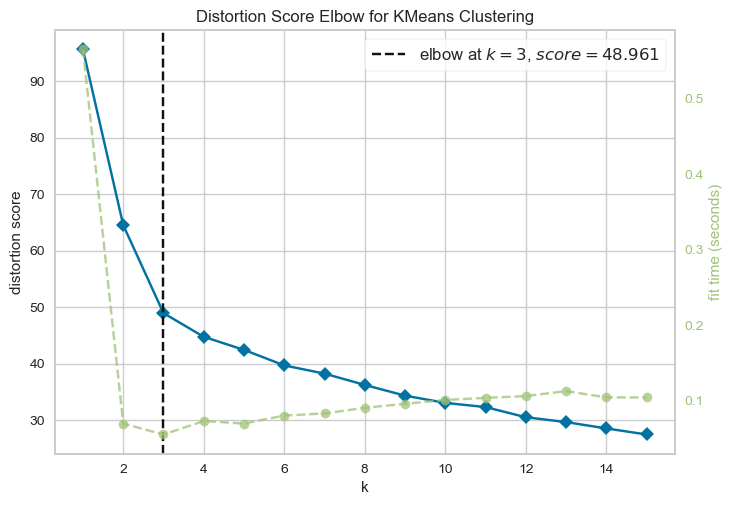

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Use KMeans clustering and visualize the optimal number of clusters with the elbow method
from  yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,16))
visualizer.fit(X)
visualizer.show()

In [ ]:
# Fit KMeans with 3 clusters and predict cluster assignments
km = KMeans(n_clusters=3)
km.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
cluster = km.predict(X)


In [ ]:
km.cluster_centers_

array([[0.31336675, 0.23561704, 0.47304983, 0.50024546, 0.24551415,
        0.44805692, 0.38008171, 0.41868823, 0.39717591, 0.14778699,
        0.47218996, 0.58422001, 0.15637525],
       [0.54668616, 0.48440931, 0.56159636, 0.53865979, 0.31521739,
        0.2467433 , 0.10474293, 0.61425577, 0.22543521, 0.48878144,
        0.18888889, 0.15852666, 0.24911502],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397]])

In [ ]:
# Display the cluster centers and inertia
print(km.inertia_)
print(km.score(X))

48.95403581962662
-48.95403581962662


In [ ]:
# Transform the data to the cluster-distance space
X_Transformed = km.transform(X)
X_Transformed =  pd.DataFrame(X_Transformed, columns = ['FEATURE-1','FEATURE-2','FEATURE-3'])
X_Transformed

,FEATURE-1,FEATURE-2,FEATURE-3
0,0.990214,1.340252,0.409675
1,0.763699,1.171229,0.471661
2,0.816526,1.166414,0.368805
3,1.263355,1.477872,0.576724
4,0.611055,0.900774,0.506876
...,...,...,...
173,1.211492,0.543638,1.317761
174,0.957847,0.248700,1.098918
175,1.171287,0.477512,1.217090
176,1.062157,0.415512,1.144300


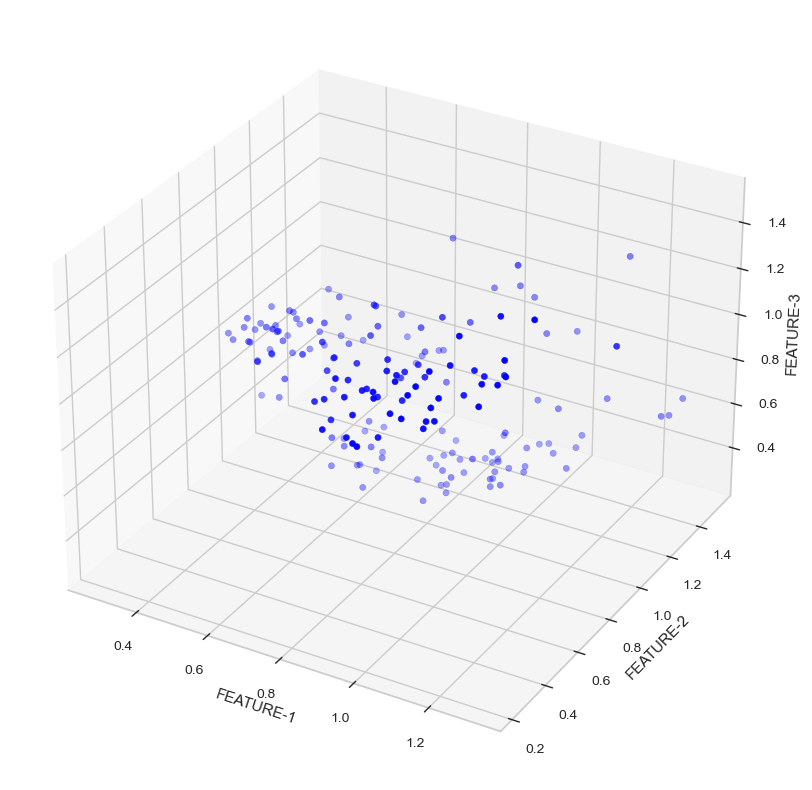

In [ ]:
# Plot the transformed features in 3D space
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_Transformed['FEATURE-1'], X_Transformed['FEATURE-2'], X_Transformed['FEATURE-3'],color="blue")
ax.set_xlabel('FEATURE-1')
ax.set_ylabel('FEATURE-2')
ax.set_zlabel('FEATURE-3')
plt.show()


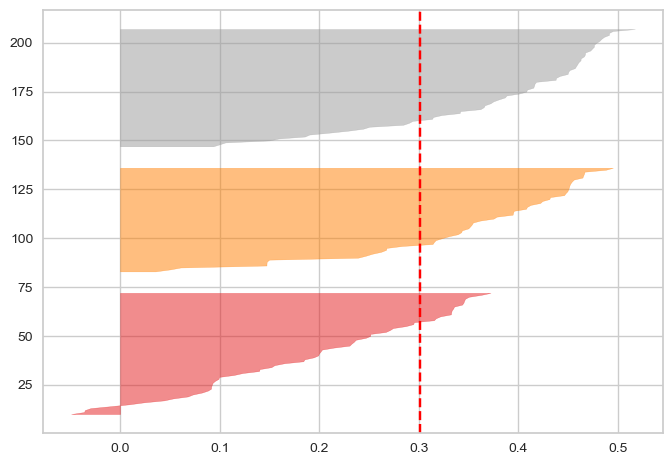

In [ ]:
# Evaluate the silhouette score for KMeans clustering
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X);

In [ ]:
# Iterate over different values of k to analyze inertia and silhouette score
inertia = []
sl_score = []

for k in range(2,16):
    km = KMeans(n_clusters=k)
    km.fit(X)
    cluster = km.predict(X)
    sl_score.append(silhouette_score(X,cluster ))
    inertia.append(km.inertia_)

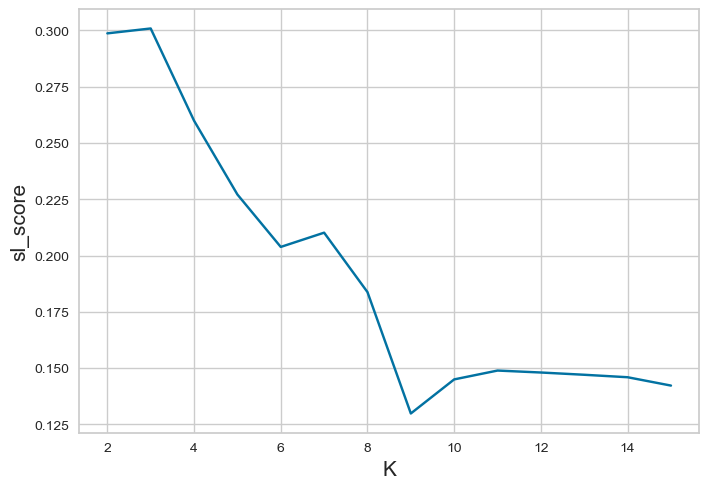

In [ ]:
# Plot silhouette scores
plt.plot(range(2,16), sl_score)
plt.xlabel('K', fontsize=15)
plt.ylabel('sl_score', fontsize=15);

### **Agglomerative Clustering**

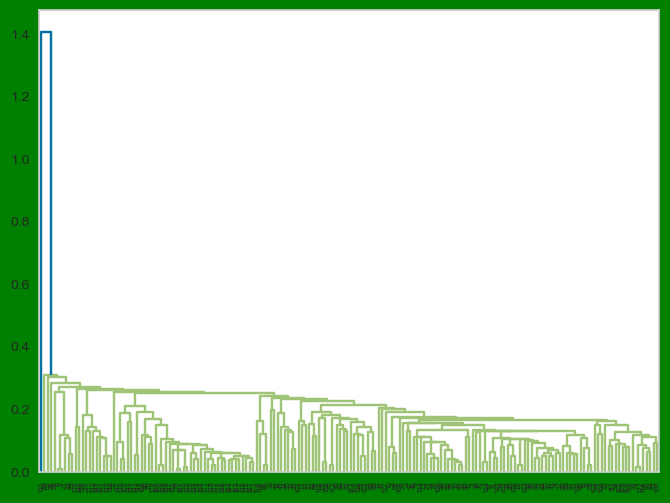

In [ ]:
# Perform hierarchical clustering and visualize the dendrogram
plt.figure(figsize=(8,6))
dendrogram(linkage(Y, method='single'));
plt.axhline(y=6, color='r', linestyle='--')
plt.axhline(y=4, color='r', linestyle='--')
plt.grid();

In [ ]:
# Fit Agglomerative Clustering with 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_Cluster = agg_cluster.fit_predict(X)
ag_Cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

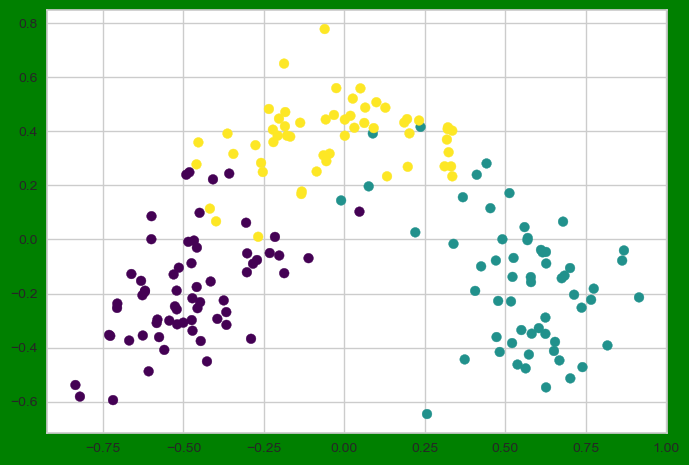

In [ ]:
# Scatter plot colored by Agglomerative Clustering labels
plt.scatter(pca_df1['PC1'], pca_df1['PC2'], c=agg_cluster.labels_,cmap='viridis');


In [ ]:
# Calculate silhouette score for hierarchical clustering
silhouette_score(X, ag_Cluster)

0.2948290632158541

In [ ]:
contingency_matrix(cluster, ag_Cluster)

array([[ 0, 26,  0],
       [ 3,  0, 22],
       [ 0,  0, 22],
       [15,  0,  0],
       [15,  0,  0],
       [ 6,  0,  3],
       [17,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10],
       [ 1,  8,  0],
       [ 1,  0,  0],
       [ 7,  1,  0],
       [ 3,  1,  0],
       [ 0,  2,  0],
       [ 3,  0,  0]], dtype=int64)

In [ ]:
# Evaluate silhouette scores for different numbers of clusters
sl_score = []

for k in range(2,16):
    agg_cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    ag_Cluster = agg_cluster.fit_predict(X)
    sl_score.append(silhouette_score(X,ag_Cluster ))


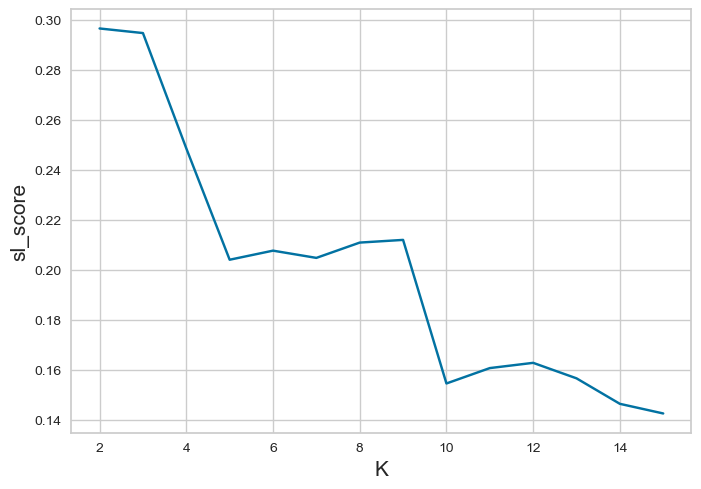

In [ ]:
# Plot silhouette scores for hierarchical clustering
plt.plot(range(2,16), sl_score)
plt.xlabel('K', fontsize=15)
plt.ylabel('sl_score', fontsize=15);

### **DBScan Clustering**

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2.5, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=2.5, min_samples=4)

In [ ]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([0], dtype=int64), array([178], dtype=int64))

In [ ]:
# Calculate nearest neighbors for DBSCAN parameter tuning
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

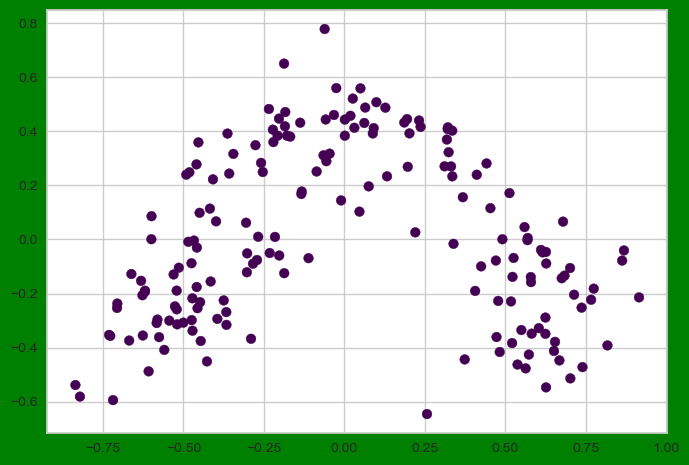

In [ ]:
# Scatter plot of PCA-transformed data with DBSCAN labels
plt.scatter(pca_df1['PC1'], pca_df1['PC2'], c=dbscan.labels_,cmap='viridis');

In [ ]:

dbscan = DBSCAN(eps=0.075, min_samples=4)
dbscan.fit(pca_df1)

DBSCAN(eps=0.075, min_samples=4)

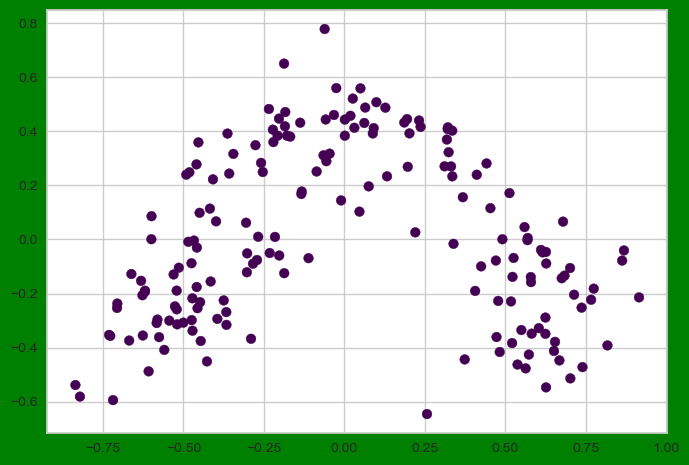

In [ ]:
plt.scatter(pca_df1['PC1'], pca_df1['PC2'], c=dbscan.labels_,cmap='viridis');

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc


In [ ]:
# Hyperparameter tuning for DBSCAN using GridSearchCV
param_grid = {'max_iter': [2,3,4,5,6],'n_clusters': [3,4,5,6]}
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid=param_grid,
                           scoring='v_measure_score',
                           cv=5,
                           n_jobs=-1)
grid_search = grid_search.fit(X)


In [ ]:
grid_search.best_params_

{'max_iter': 2, 'n_clusters': 3}

In [ ]:
grid_search.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=KMeans(), n_jobs=-1,
             param_grid={'max_iter': [2, 3, 4, 5, 6],
                         'n_clusters': [3, 4, 5, 6]},
             scoring='v_measure_score')>

In [ ]:
cluster=grid_search.predict(X)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

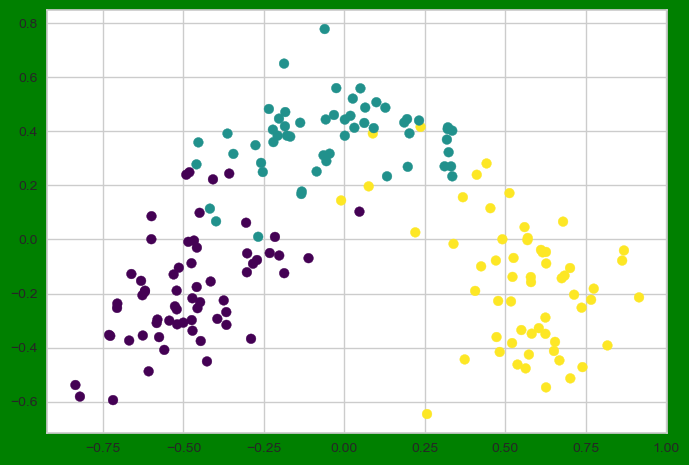

In [ ]:
plt.scatter(pca_df1['PC1'], pca_df1['PC2'], c=cluster,cmap='viridis')

In [ ]:
import sklearn as sk

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [ ]:
param_grid = {'eps': [0.0065,0.0075,0.008,0.0053],'min_samples': [3,4,5,6]}
grid_search = GridSearchCV(estimator = DBSCAN(),param_grid=param_grid,scoring='v_measure_score',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X)

In [ ]:
grid_search.best_params_

{'eps': 0.0065, 'min_samples': 3}

*Now, applying clustering on a pair of the attributes.*

In [ ]:
X = df[['Flavanoids','Alcohol']]

In [ ]:
X

,Flavanoids,Alcohol
0,3.06,14.23
1,2.76,13.20
2,3.24,13.16
3,3.49,14.37
4,2.69,13.24
...,...,...
173,0.61,13.71
174,0.75,13.40
175,0.69,13.27
176,0.68,13.17


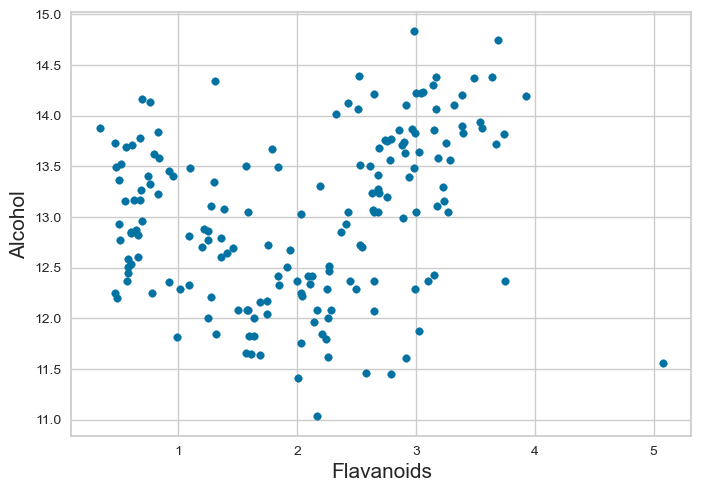

In [ ]:
plt.scatter(X['Flavanoids'], X['Alcohol'], s=30)
plt.xlabel('Flavanoids', fontsize=15)
plt.ylabel('Alcohol', fontsize=15);

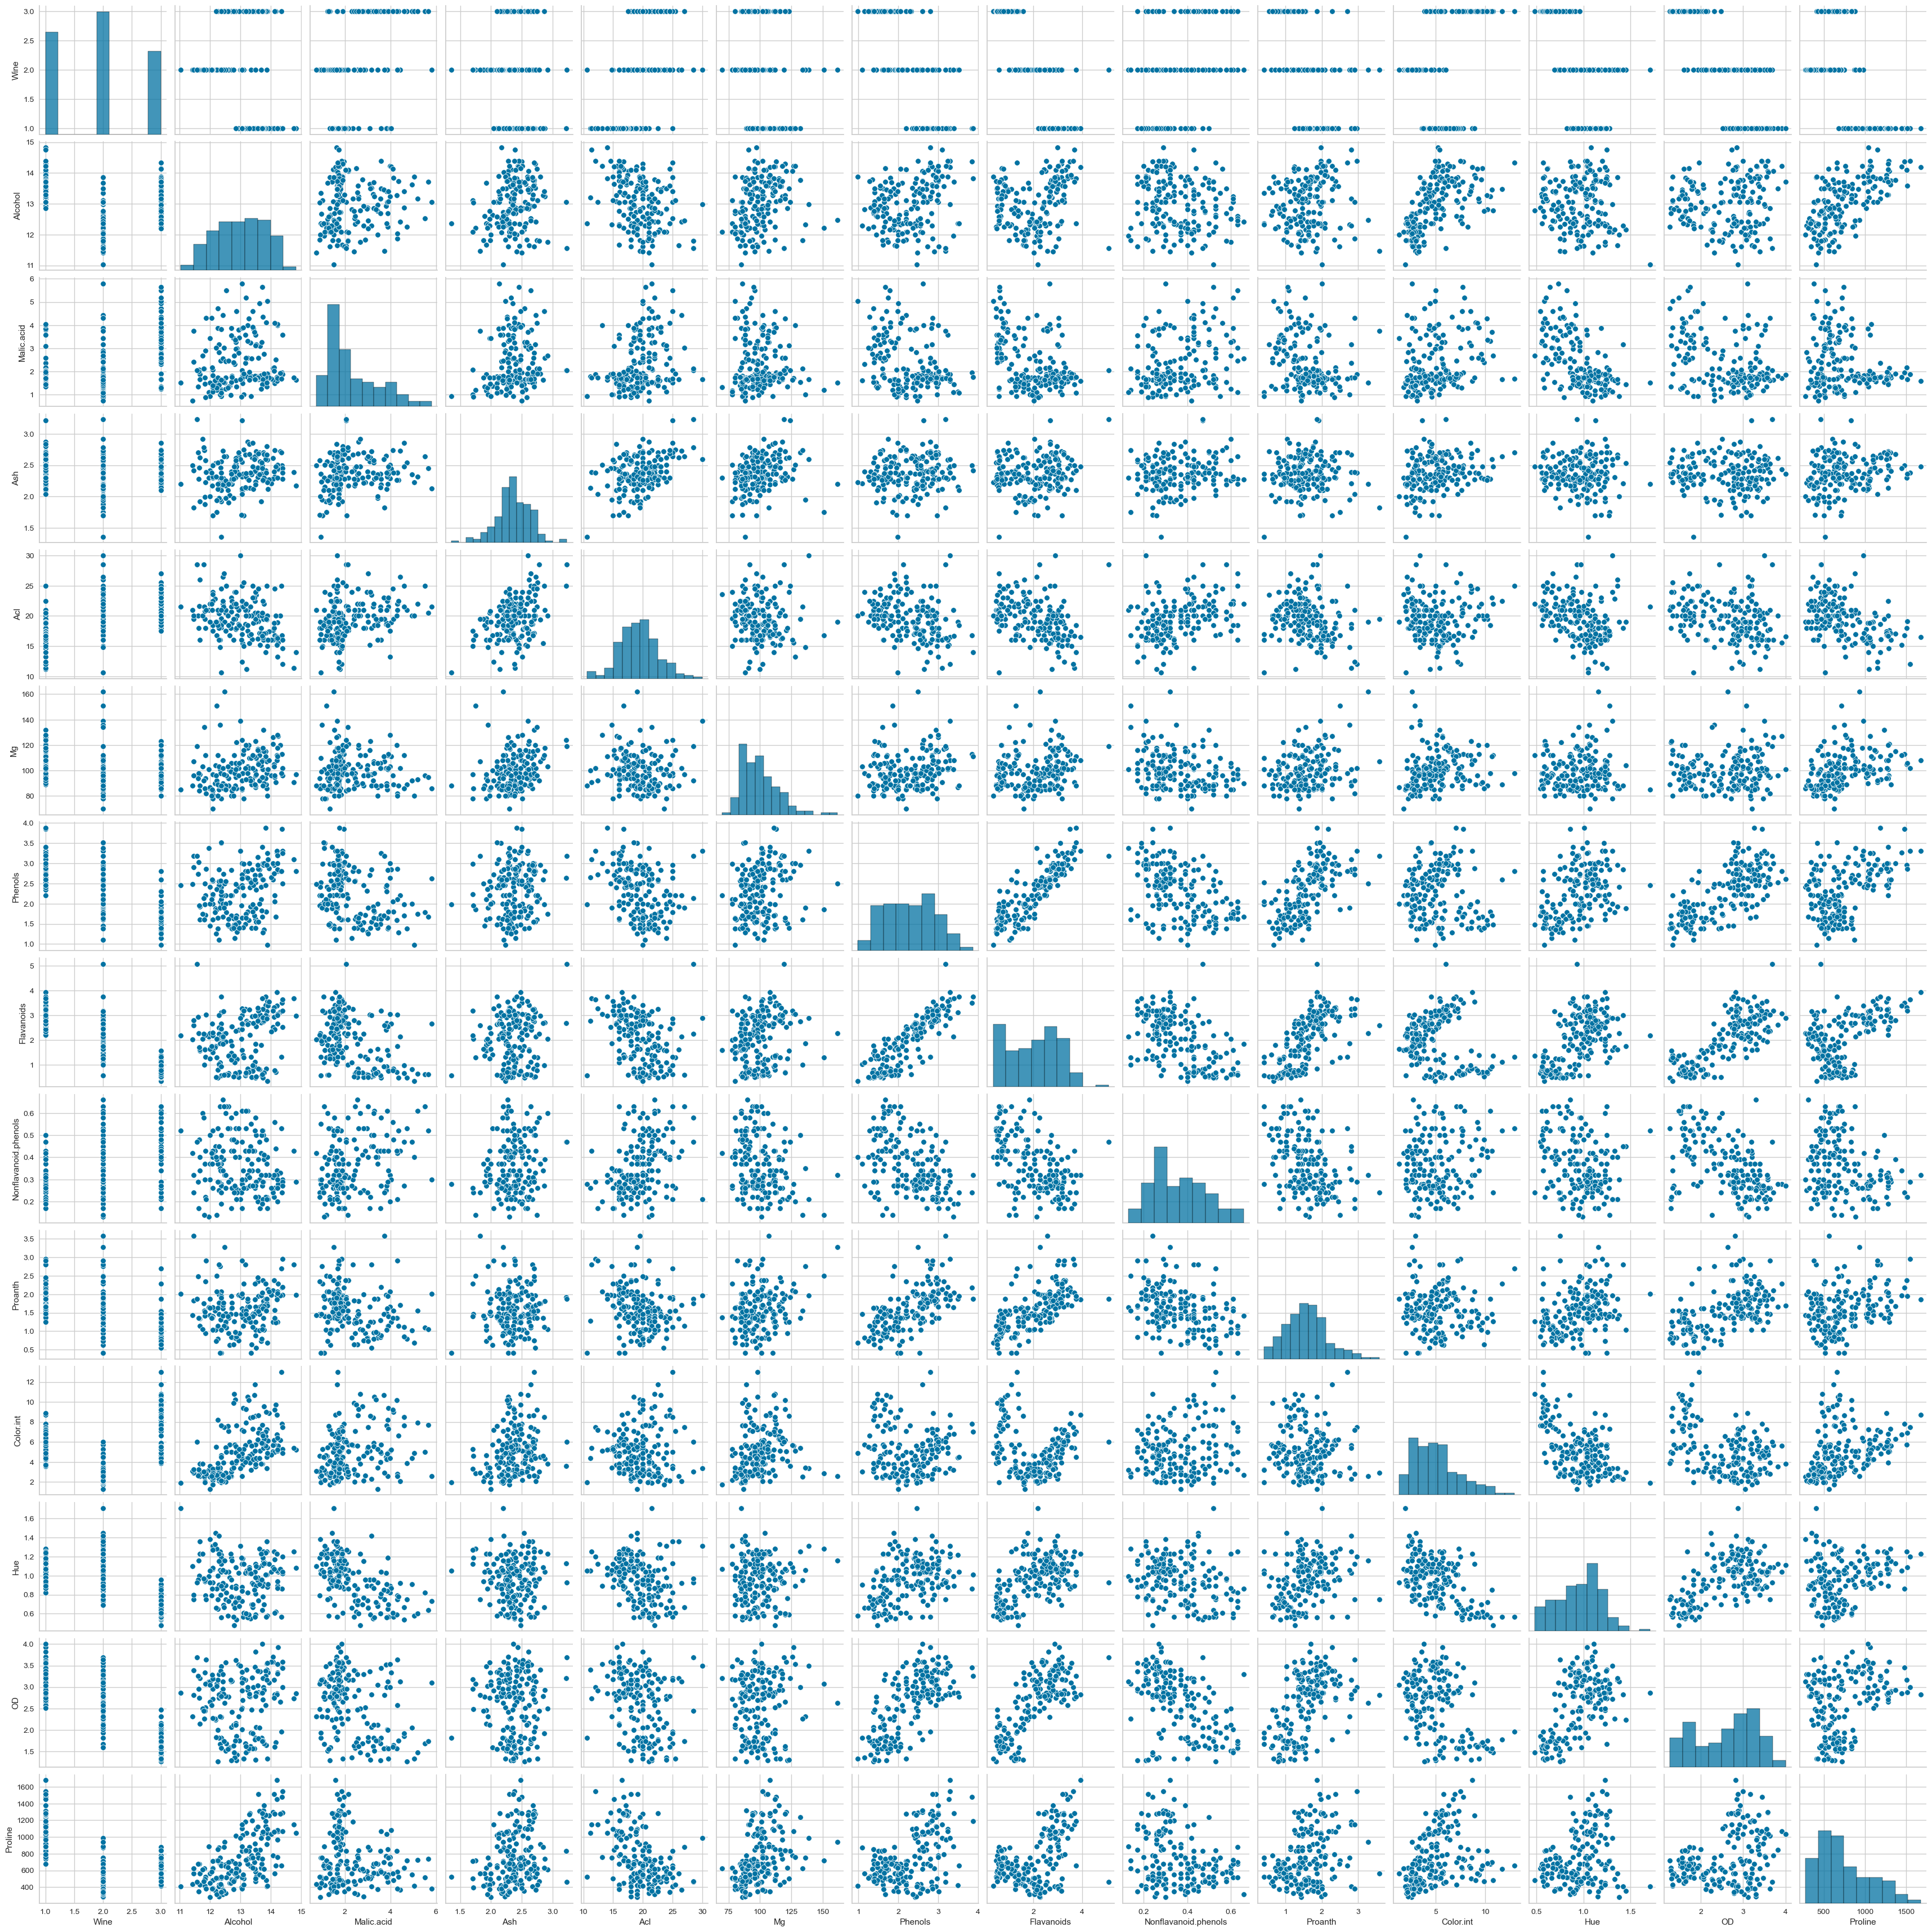

In [ ]:
sns.pairplot(df)

*from the above pairplots we can see for which pair of features we can get better clustering*


*The pair of features that we are fetching are Alcohol and Flavanoids.*

In [ ]:
km1 = KMeans(init='k-means++',max_iter=19,n_clusters=3)
km1=km1.fit(X)

In [ ]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
cluster = km1.predict(X)

X["Cluster"]=cluster
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
km1.cluster_centers_

array([[ 2.09696429, 12.13196429],
       [ 3.04111111, 13.68412698],
       [ 0.88457627, 13.09525424]])

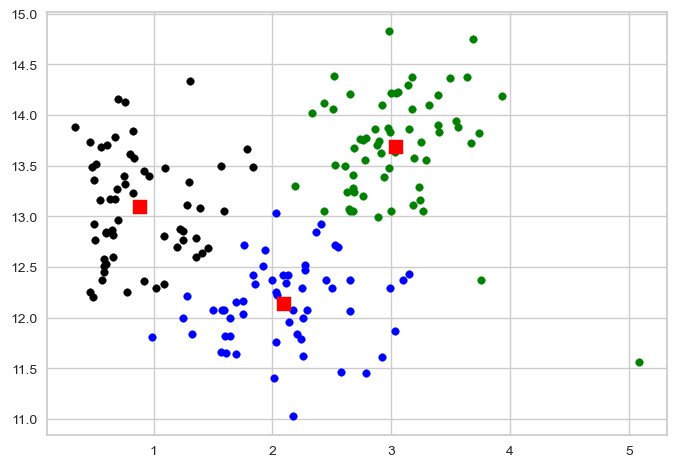

In [ ]:
labels = [0, 1, 2]
colors = ["blue", "green", "black"]

for label, color in zip(labels, colors):
    index = X["Cluster"]==label
    plt.scatter(X.loc[index, "Flavanoids"],
                X.loc[index, "Alcohol"],
                c = color,
                s=30)

plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], color="red", marker="s", s=100);

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_samples(X, km1.labels_)

array([0.7027313 , 0.54191923, 0.56623664, 0.65974011, 0.54282356,
       0.69159939, 0.56996283, 0.61827965, 0.57419019, 0.72966692,
       0.70835952, 0.57799021, 0.69693964, 0.58545457, 0.6397061 ,
       0.70721275, 0.69266003, 0.70500146, 0.60484608, 0.7154077 ,
       0.72129811, 0.34966439, 0.71447521, 0.41901739, 0.61147257,
       0.43227125, 0.65020702, 0.34470064, 0.72854532, 0.5387797 ,
       0.71612723, 0.70046361, 0.67171326, 0.6928316 , 0.58414338,
       0.68033828, 0.55791097, 0.32327574, 0.43110294, 0.70347298,
       0.68702889, 0.60719278, 0.6804405 , 0.52264125, 0.50205465,
       0.64485023, 0.67873542, 0.70838173, 0.70894876, 0.68498713,
       0.51382138, 0.72967674, 0.64085807, 0.70437607, 0.71934263,
       0.67331065, 0.70113439, 0.61780378, 0.64675614, 0.64850266,
       0.60072342, 0.61243208, 0.28980511, 0.35371509, 0.7219289 ,
       0.55278529, 0.54453255, 0.70219359, 0.63839894, 0.58786304,
       0.59903818, 0.717337  , 0.29839471, 0.44804801, 0.73178

In [ ]:
silhouette_score(X, km1.labels_)

0.6302686535261834

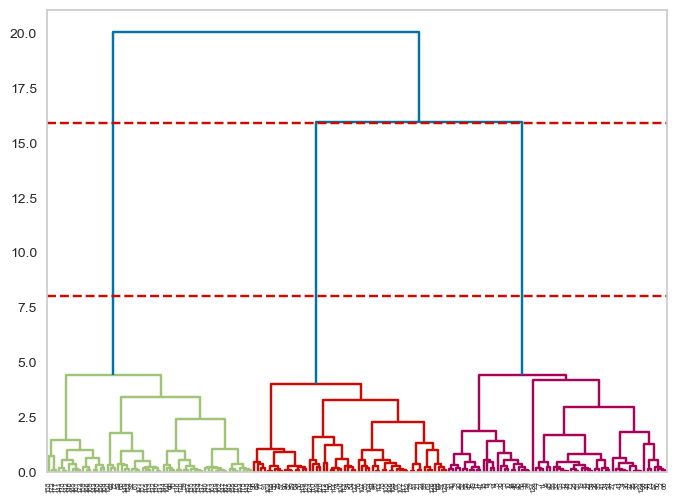

In [ ]:
plt.figure(figsize=(8,6))

dendrogram(linkage(X, method='ward'));
plt.axhline(y=15.9, color='r', linestyle='--')
plt.axhline(y=8, color='r', linestyle='--')
plt.grid();

In [ ]:
Y1= X.iloc[: , 0:2].values

In [ ]:
Ag1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Ag1=Ag1.fit(Y1)

In [ ]:
Ag1.fit_predict(Y1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

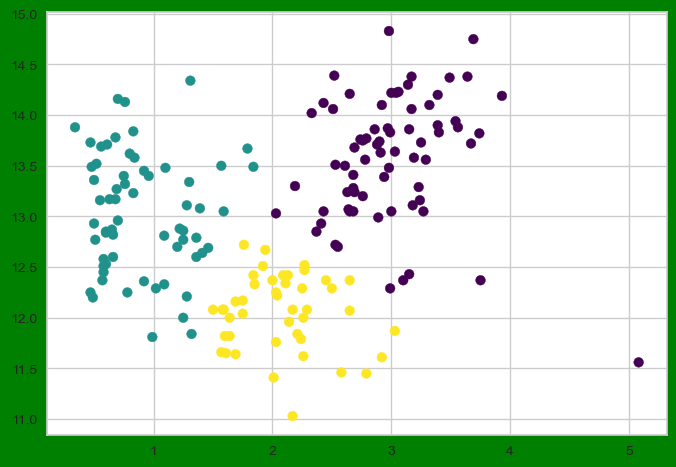

In [ ]:
plt.scatter(Y1[:, 0], Y1[:, 1], c=Ag1.labels_,cmap='viridis');

In [ ]:
silhouette_score(Y1, Ag1.labels_)

0.4719196598534794

In [ ]:
df2 = df.iloc[: , 0]

In [ ]:
arr1 = Y1[:, 0],
arr2=Y1[:, 1]

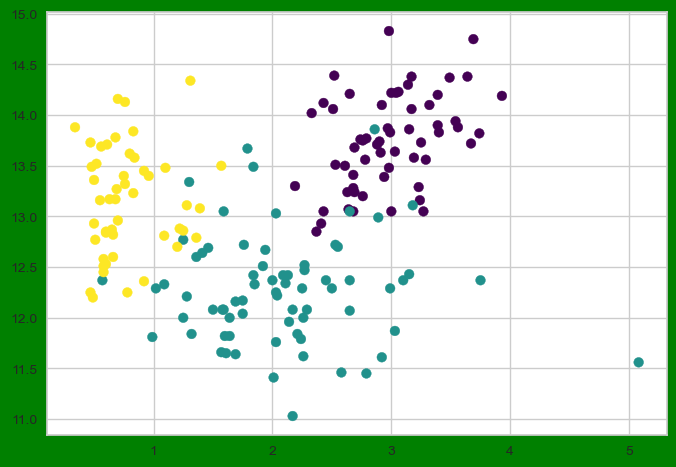

In [ ]:

plt.scatter(arr1, arr2, c=df2,cmap='viridis');

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('green')

<Figure size 800x550 with 0 Axes>